In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:

matplotlib.style.use('default')
df2 = pd.read_csv('songs_data_2.csv', header=0)  # , dtype=str)
df2.head()
df2.isnull().sum()

Artist              0
Song                0
Year                0
Popularity          0
Track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [4]:
df2['Popularity'] = df2['Popularity'].apply(int)
df2.shape

(49990, 18)

In [5]:
df2.head()

,Artist,Song,Year,Popularity,Track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Cage The Elephant,Cigarette Daydreams,2013,79,0lkQOB949M2gLyut86aJ1b,0.636,0.676,2,-3.442,1,0.0263,0.08070,0.000000,0.0831,0.273,113.980,208760,4
1,Grimes,Kill V. Maim,2015,65,3WXhshrs1fzwF3rQE399Gq,0.578,0.947,11,-2.431,0,0.0359,0.00744,0.081600,0.1050,0.456,134.033,246007,4
2,K CAMP,Comfortable,2014,66,2BqQQXuBOuhaWeUP7okEx0,0.765,0.412,7,-8.932,0,0.0726,0.72000,0.000000,0.1260,0.632,109.986,211573,4
3,Stunna 4 Vegas,UP THE SMOKE (with Offset),2020,62,3faAAUxohrxqYhPlneZ3XV,0.899,0.735,4,-7.719,1,0.4000,0.05060,0.000000,0.1500,0.884,143.001,188107,4
4,Tracy Chapman,Give Me One Reason,1995,68,4vDBJeeQCbhP9FaPPMsYkY,0.608,0.419,11,-10.016,1,0.0331,0.60200,0.000008,0.1080,0.602,100.220,268333,4


## Start the modeling here.

In [6]:
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

### Drop unnecessary or non-numeric columns.
### Convert the features to float just to make sure.
###     <br>
### Is leaving the year in data leakage? Newer songs will usually be more popular?
### Could solve this by only looking at songs from a certain period (e.g. a decade).

In [7]:
scale = MinMaxScaler()
df3 = df2.drop(['Artist', 'Song', 'time_signature', 'Popularity', 'Track_id'], axis=1)
X = scale.fit_transform(df3)
X = pd.DataFrame(data=X, columns=df3.columns)
print(X.head())

y = df2['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

       Year  danceability    energy       key  loudness  mode  speechiness  \
0  0.898734      0.648980  0.678708  0.181818  0.908711   1.0     0.027568   
1  0.924051      0.589796  0.950802  1.000000  0.927979   0.0     0.037631   
2  0.911392      0.780612  0.413643  0.636364  0.804082   0.0     0.076101   
3  0.987342      0.917347  0.737947  0.363636  0.827200   1.0     0.419287   
4  0.670886      0.620408  0.420671  1.000000  0.783423   1.0     0.034696   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  
0      0.081024          0.000000  0.083686  0.275758  0.517858     0.277106  
1      0.007470          0.081600  0.105740  0.460606  0.608967     0.332972  
2      0.722892          0.000000  0.126888  0.638384  0.499711     0.281325  
3      0.050803          0.000000  0.151057  0.892929  0.649712     0.246130  
4      0.604418          0.000008  0.108761  0.608081  0.455341     0.366458  


### Comparison of random forest and decision tree feature importances shows they are quite similar.
### Year is the most important for both of these with mode being the lowest (see main data_fitting notebook).
### <br>
### Try XGboost regressor:

In [8]:
import xgboost as xgb

In [10]:
evaluation = [( X_train, y_train), ( X_test, y_test)]
model = xgb.XGBRegressor()
xgbfit = model.fit(X_train, y_train, eval_set=evaluation,
                   early_stopping_rounds=10, verbose=False)
xgb_pred = xgbfit.predict(X_test)
xgb_train = xgbfit.predict(X_train)

print('XGBoost results:')
print('R2:', metrics.r2_score(y_test, xgb_pred))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(y_train, xgb_train)))

XGBoost results:
R2: 0.877924680532134
RMSE Test: 5.47080669021406
RMSE Train: 4.4838682477691885


### Less overfitting than the Decision Tree and Random Forest methods. 

Text(0, 0.5, 'Predicted Y')

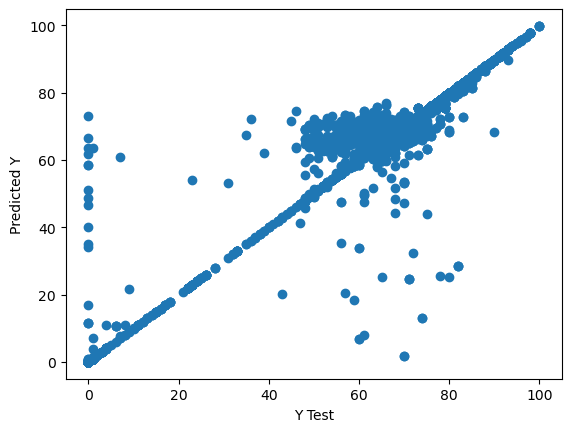

In [390]:
plt.scatter(y_test, xgb_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

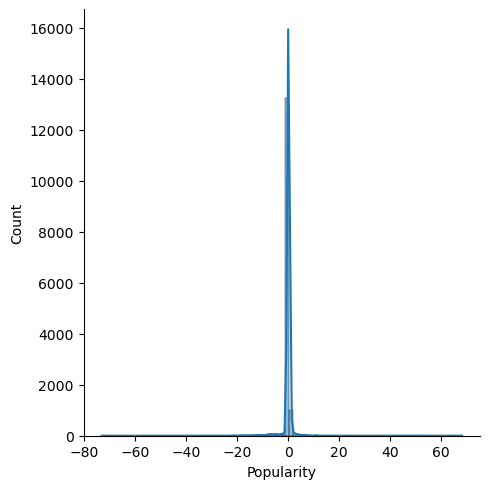

In [391]:
ax = sns.displot((y_test-xgb_pred), bins=100, kde=True)

Feature: 0, Score: 0.06341
Feature: 1, Score: 0.04818
Feature: 2, Score: 0.06378
Feature: 3, Score: 0.03496
Feature: 4, Score: 0.08444
Feature: 5, Score: 0.07922
Feature: 6, Score: 0.04463
Feature: 7, Score: 0.07431
Feature: 8, Score: 0.16100
Feature: 9, Score: 0.04608
Feature: 10, Score: 0.10555
Feature: 11, Score: 0.07379
Feature: 12, Score: 0.12065


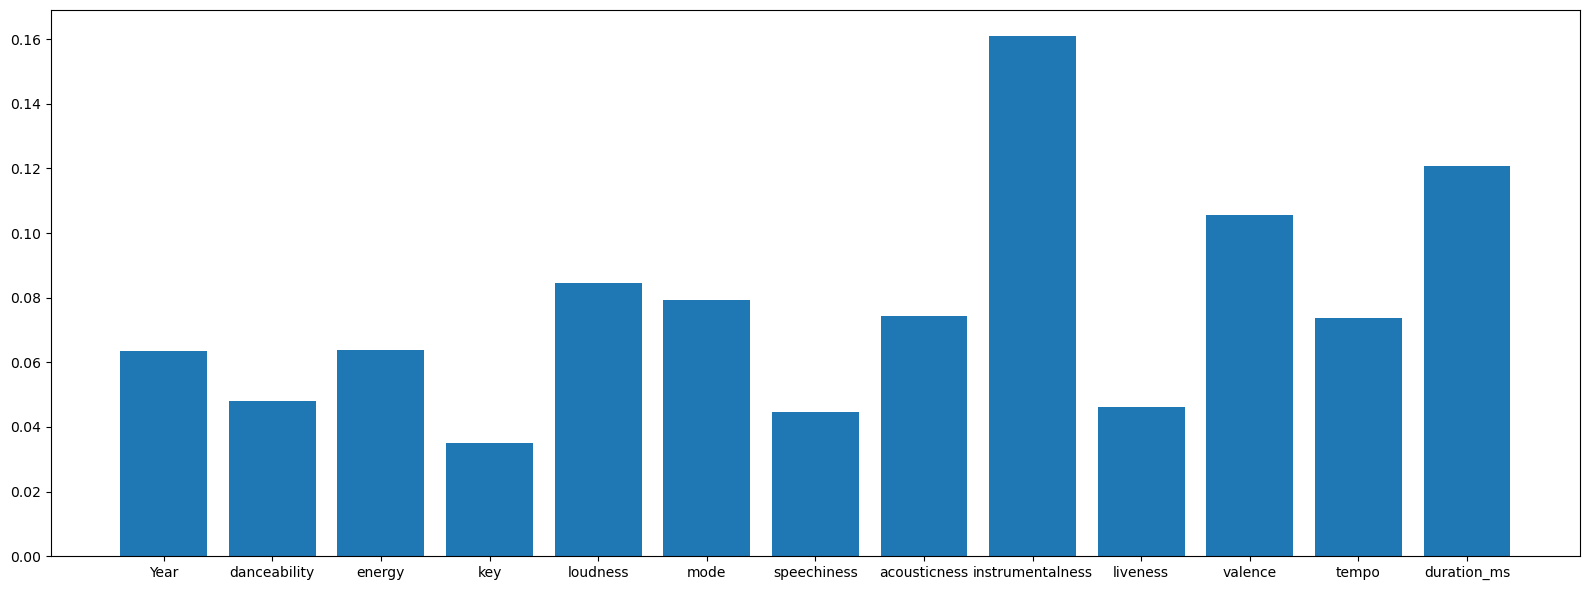

In [392]:
importance = xgbfit.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig = plt.figure(figsize=(16,6))
plt.bar([x for x in X.columns], importance)
plt.tight_layout()
plt.show()

### Now attempt to search for hyperparameters that result a better model.

In [393]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import cross_val_score

In [394]:
space={'max_depth': hp.quniform("max_depth", 5, 13, 1),
        'n_estimators': hp.quniform ('n_estimators', 100, 500, 10),
        'eta': hp.uniform ('eta', 0.03, 0.2),
        'gamma': hp.uniform ('gamma', 0, 10),
    }

def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators=int(space['n_estimators']),
                    max_depth=int(space['max_depth']),
                    eta=space['eta'],
                    gamma=space['gamma']
                    )
    
    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10, verbose=False)
    
    pred = clf.predict(X_test)
    pred_train = clf.predict(X_train)
    rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred))
    rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    # This is a stopgap loss function until I learn more about it.
    if (((rmse_test - rmse_train) < 0) or (rmse_test / rmse_train > 1.5)):
        accuracy = rmse_test * 2
    else:
        accuracy = rmse_train  # (rmse_test - 2 * rmse_train) * rmse_test
    print("SCORE, RMSEtest, and RMSEtrain:", f'{accuracy}' + '  ' + f'{rmse_test}' + '  ' + f'{rmse_train}')
    return {'loss': accuracy, 'status': STATUS_OK }

In [395]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

SCORE, RMSEtest, and RMSEtrain:
6.10141335128813  3.050706675644065  0.456575653650053
SCORE, RMSEtest, and RMSEtrain:
7.725587694327794  3.862793847163897  2.3128452029893425
SCORE, RMSEtest, and RMSEtrain:
7.6557620360315335  3.8278810180157667  2.00654613430062
SCORE, RMSEtest, and RMSEtrain:
6.591181651617804  3.295590825808902  1.1065089218429272
SCORE, RMSEtest, and RMSEtrain:
7.592251420000113  3.7961257100000565  2.1660015856097954
SCORE, RMSEtest, and RMSEtrain:
6.787662675832159  3.3938313379160796  1.4684501133714876
SCORE, RMSEtest, and RMSEtrain:
3.409427984019948  4.545572530717757  3.409427984019948
SCORE, RMSEtest, and RMSEtrain:
6.255875119495106  3.127937559747553  0.4190598133015032
SCORE, RMSEtest, and RMSEtrain:
5.483026999535652  6.152697790283104  5.483026999535652
SCORE, RMSEtest, and RMSEtrain:
6.652239368330936  3.326119684165468  1.1110415273290277
SCORE, RMSEtest, and RMSEtrain:
7.477963498769289  3.7389817493846444  1.9656381673859755
SCORE, RMSEtest, and R

In [404]:
print("The best hyperparameters are : ","\n")
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams['n_estimators'] = int(best_hyperparams['n_estimators'])
print(best_hyperparams)

The best hyperparameters are :  

{'eta': 0.05740398629457646, 'gamma': 4.308176337528561, 'max_depth': 8, 'n_estimators': 440}


{'eta': 0.05740398629457646, 'gamma': 4.308176337528561, 'max_depth': 8, 'n_estimators': 440}
XGBoost results:
R2: 0.9340318567083735
RMSE Test: 4.02165271592596
RMSE Train: 2.688565472419438


Text(0, 0.5, 'Predicted Y')

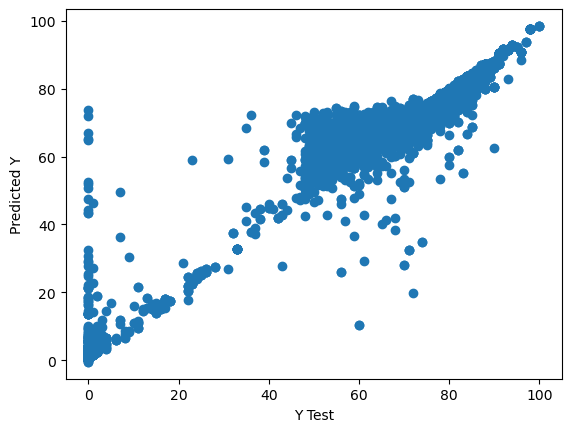

In [405]:
gpu_dict = best_hyperparams
evaluation = [(X_train, y_train), (X_test, y_test)]
print(gpu_dict)

xgbmodel = xgb.XGBRegressor(**gpu_dict)
xgbfit = xgbmodel.fit(X_train, y_train,
                      eval_set=evaluation, eval_metric="rmse",
                      early_stopping_rounds=10, verbose=False)
xgb_pred = xgbfit.predict(X_test)
xgb_train = xgbfit.predict(X_train)
print('XGBoost results:')
print('R2:', metrics.r2_score(y_test, xgb_pred))
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))
print('RMSE Train:', np.sqrt(metrics.mean_squared_error(y_train, xgb_train)))

plt.scatter(y_test, xgb_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Testing different hyperparameters and plotting test and train error.
### Higher difference between train and test error indicates overfitting.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.1min finished


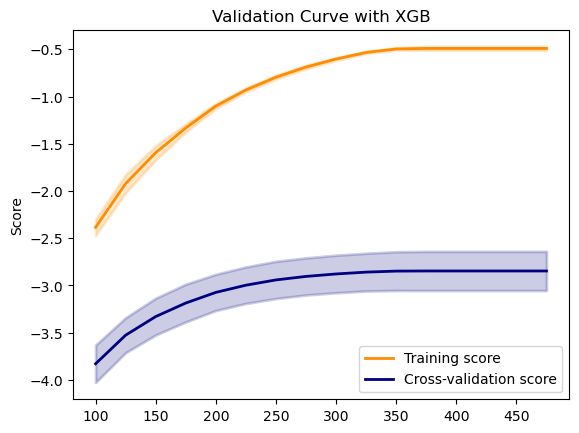

[-1.44486647 -1.60511012 -1.73538308 -1.85386893 -1.97343737 -2.06769093
 -2.14700609 -2.21763659 -2.27638837 -2.32613845 -2.35297724 -2.35707984
 -2.35708002 -2.3570803  -2.35708057 -2.35708077]


In [398]:
param_range = np.arange(100, 500, 25)  # [None, 1, 2, 3, 4]  # np.linspace(0, 2)  #  np.arange(2, 20)
train_scores, test_scores = validation_curve(
    xgb.XGBRegressor(**{'max_depth': 8, 'eta': 0.3, 'gamma': 1.8, 'lambda': 3.2}),
    X,
    y,
    param_name='n_estimators',
    param_range=param_range,
    scoring='neg_root_mean_squared_error',
    verbose=1
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with XGB")
# plt.xlabel(r"min_sample_split")
plt.ylabel("Score")
# plt.ylim(0.0, 1.1)
lw = 2

if param_range[0] == None: # Use this to plot None as the first element.
    param_range[0] = 0

plt.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()
print(test_scores_mean - train_scores_mean)

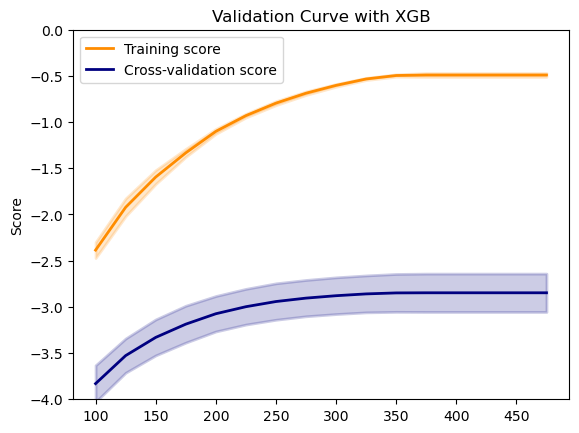

In [399]:
plt.title("Validation Curve with XGB")
# plt.xlabel(r"min_sample_split")
plt.ylabel("Score")
plt.ylim(-4, 0)
lw = 2

if param_range[0] == None: # Use this to plot None as the first element.
    param_range[0] = 0

plt.plot(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()